In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [3]:
# read the data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Statistics Work/pisa2009train.csv"
df_train = pd.read_csv(path)
path2="/content/drive/MyDrive/Statistics Work/pisa2009test.csv"
df_test = pd.read_csv(path2)
# returns the first 5 rows
df_train.head()

Mounted at /content/drive


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [4]:
df_test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


**GENERAL OVERVIEW OF TRAINING DATA**


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [6]:
# Null values for training data
df_train.isnull().sum()

,0
grade,0
male,0
raceeth,35
preschool,56
expectBachelors,62
motherHS,97
motherBachelors,397
motherWork,93
fatherHS,245
fatherBachelors,569


In [7]:
# Obtaining percentage of missing values
perc_missing_values_training = (df_train.isnull().sum() / len(df_train)) * 100
perc_missing_values_training

,0
grade,0.000000
male,0.000000
raceeth,0.955501
preschool,1.528802
expectBachelors,1.692602
motherHS,2.648103
motherBachelors,10.838111
motherWork,2.538903
fatherHS,6.688507
fatherBachelors,15.533716


**GENERAL OVERVIEW OF TEST DATA**



In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

In [9]:
# Null values for test data
df_test.isnull().sum()

,0
grade,0
male,0
raceeth,13
preschool,21
expectBachelors,23
motherHS,45
motherBachelors,188
motherWork,36
fatherHS,125
fatherBachelors,288


In [10]:
# Obtaining percentage of missing values
perc_missing_values_test = (df_test.isnull().sum() / len(df_test)) * 100
perc_missing_values_test

,0
grade,0.000000
male,0.000000
raceeth,0.828025
preschool,1.337580
expectBachelors,1.464968
motherHS,2.866242
motherBachelors,11.974522
motherWork,2.292994
fatherHS,7.961783
fatherBachelors,18.343949


In [11]:
df_train.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
grade,3663.0,NaN,NaN,NaN,10.089817,0.554375,8.0,10.0,10.0,10.0,12.0
male,3663.0,NaN,NaN,NaN,0.511057,0.499946,0.0,0.0,1.0,1.0,1.0
raceeth,3628,7,White,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preschool,3607.0,NaN,NaN,NaN,0.722761,0.447697,0.0,0.0,1.0,1.0,1.0
expectBachelors,3601.0,NaN,NaN,NaN,0.785893,0.410259,0.0,1.0,1.0,1.0,1.0
motherHS,3566.0,NaN,NaN,NaN,0.879978,0.325033,0.0,1.0,1.0,1.0,1.0
motherBachelors,3266.0,NaN,NaN,NaN,0.348132,0.476451,0.0,0.0,0.0,1.0,1.0
motherWork,3570.0,NaN,NaN,NaN,0.734454,0.441685,0.0,0.0,1.0,1.0,1.0
fatherHS,3418.0,NaN,NaN,NaN,0.859274,0.347789,0.0,1.0,1.0,1.0,1.0
fatherBachelors,3094.0,NaN,NaN,NaN,0.331933,0.470983,0.0,0.0,0.0,1.0,1.0


In [12]:
numerical = df_train[['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize', 'readingScore']]

print('Mean:')
print(numerical.mean())  # Call the method

print('Median:')
print(numerical.median())  # Call the method

print('Mode:')
print(numerical.mode())  # Call the method

Mean:
minutesPerWeekEnglish     266.208225
studentsInEnglish          24.499414
schoolSize               1369.316767
readingScore              497.911403
dtype: float64
Median:
minutesPerWeekEnglish     250.00
studentsInEnglish          25.00
schoolSize               1212.00
readingScore              499.66
dtype: float64
Mode:
   minutesPerWeekEnglish  studentsInEnglish  schoolSize  readingScore
0                  225.0               30.0      1680.0        473.28


**Null values treatment Train Data**



In [13]:
from sklearn.impute import SimpleImputer

# Numerical columns
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
df_train[numerical_features] = numerical_imputer.fit_transform(df_train[numerical_features])

# Categorical columns
categorical_features = df_train.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_features] = categorical_imputer.fit_transform(df_train[categorical_features])

In [14]:
df_train.isnull().sum()

,0
grade,0
male,0
raceeth,0
preschool,0
expectBachelors,0
motherHS,0
motherBachelors,0
motherWork,0
fatherHS,0
fatherBachelors,0


**Null values treatment Test Data**



In [15]:
from sklearn.impute import SimpleImputer

# Numerical columns
numerical_features = df_test.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
df_test[numerical_features] = numerical_imputer.fit_transform(df_test[numerical_features])

# Categorical columns
categorical_features = df_test.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_test[categorical_features] = categorical_imputer.fit_transform(df_test[categorical_features])

In [16]:
df_test.isnull().sum()

,0
grade,0
male,0
raceeth,0
preschool,0
expectBachelors,0
motherHS,0
motherBachelors,0
motherWork,0
fatherHS,0
fatherBachelors,0


## <span style='font-size:large'>**Summary Statistics**</span>



In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
grade,3663.0,10.089817,0.554375,8.00,10.000000,10.00,10.00,12.0
male,3663.0,0.511057,0.499946,0.00,0.000000,1.00,1.00,1.0
preschool,3663.0,0.722761,0.444261,0.00,0.000000,1.00,1.00,1.0
expectBachelors,3663.0,0.785893,0.406771,0.00,1.000000,1.00,1.00,1.0
motherHS,3663.0,0.879978,0.320700,0.00,1.000000,1.00,1.00,1.0
motherBachelors,3663.0,0.348132,0.449884,0.00,0.000000,0.00,1.00,1.0
motherWork,3663.0,0.734454,0.436041,0.00,0.000000,1.00,1.00,1.0
fatherHS,3663.0,0.859274,0.335954,0.00,1.000000,1.00,1.00,1.0
fatherBachelors,3663.0,0.331933,0.432849,0.00,0.000000,0.00,1.00,1.0
fatherWork,3663.0,0.853061,0.342646,0.00,1.000000,1.00,1.00,1.0


**Univariate Analysis**

In [19]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


In [20]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

**Numerical variables**

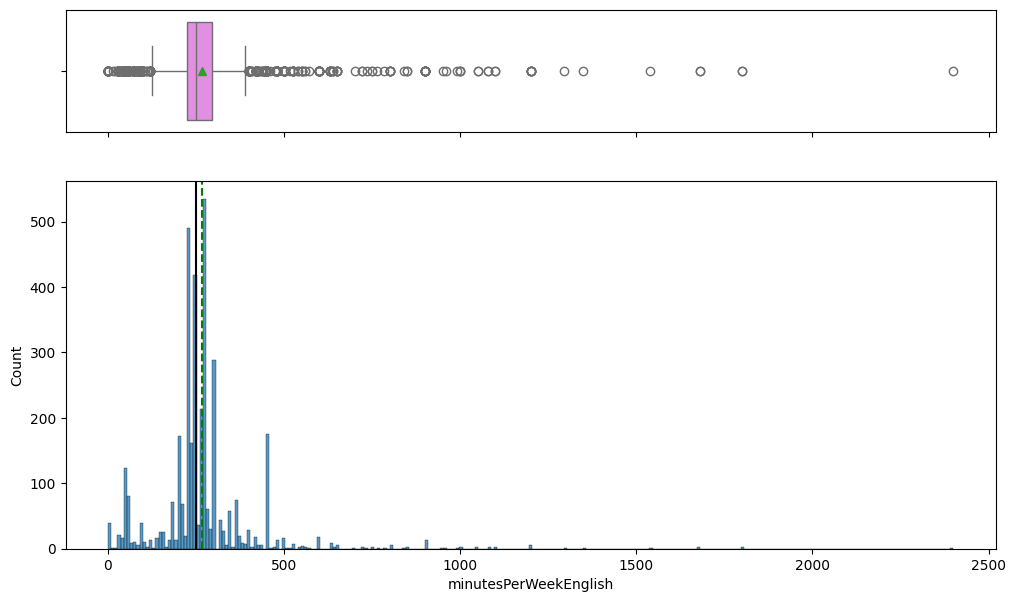

In [21]:
histogram_boxplot(df_train, 'minutesPerWeekEnglish')

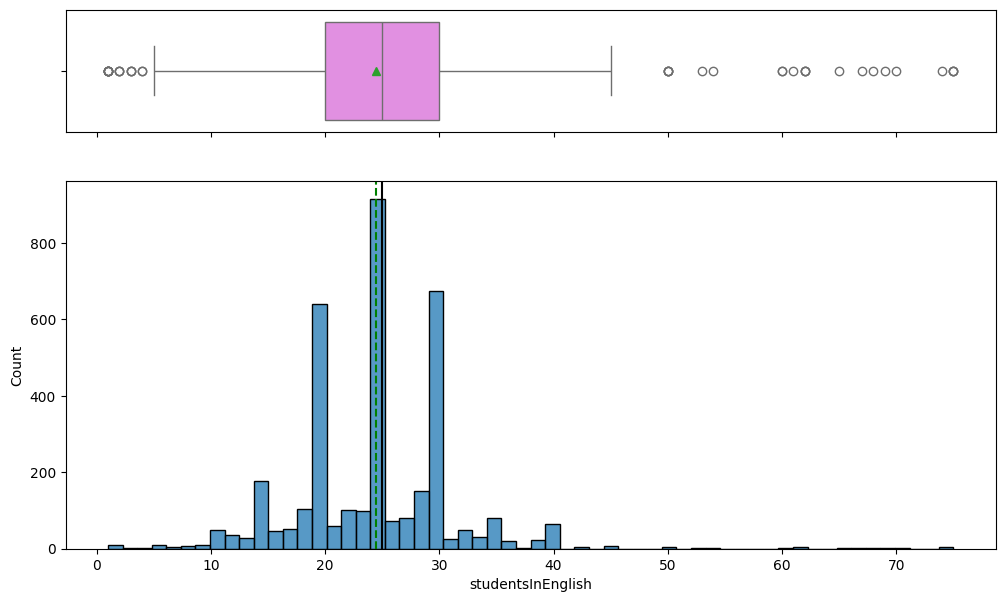

In [22]:
histogram_boxplot(df_train, 'studentsInEnglish')

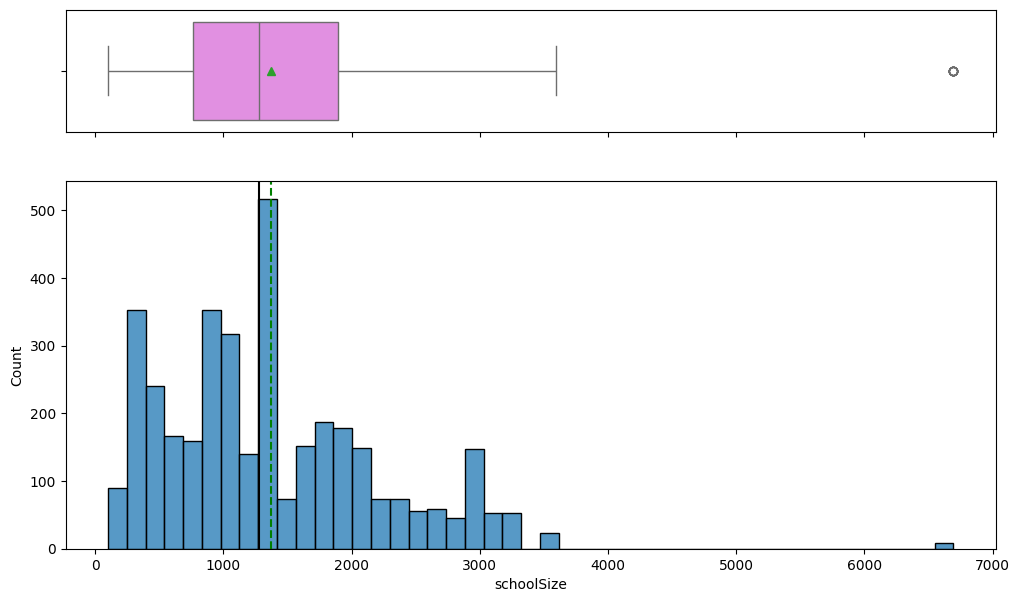

In [23]:
histogram_boxplot(df_train, 'schoolSize')

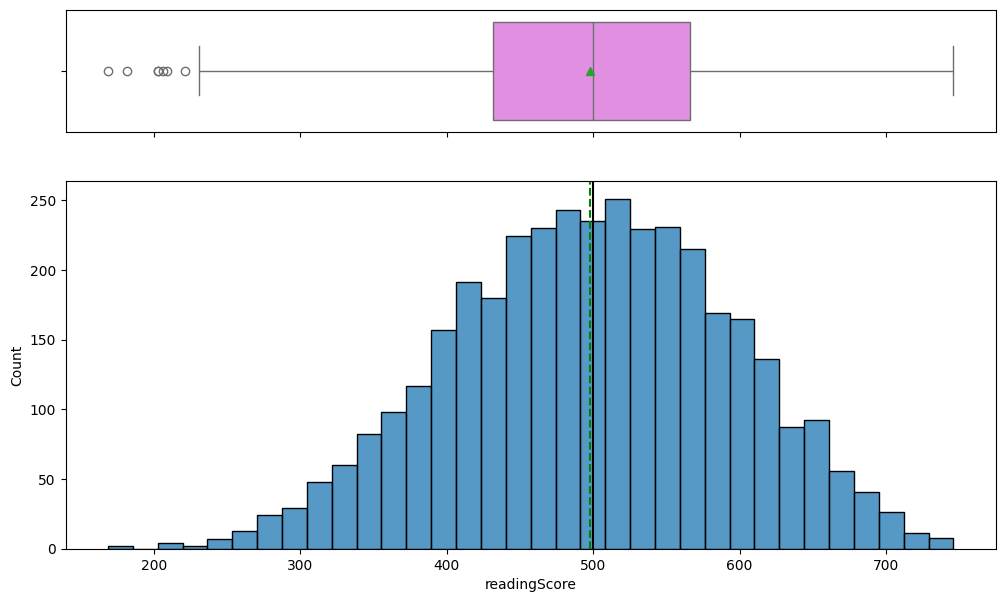

In [24]:
histogram_boxplot(df_train, 'readingScore')

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


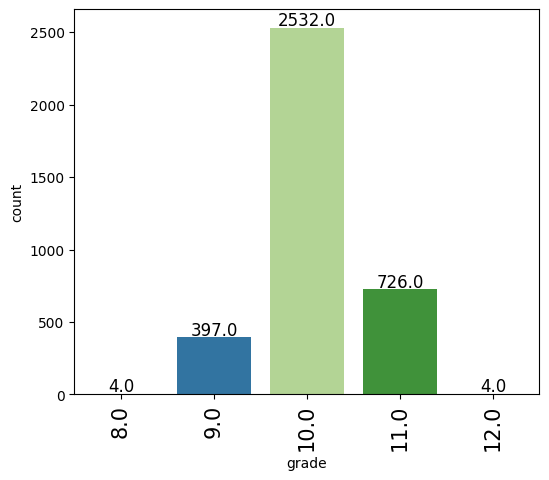

In [25]:
labeled_barplot(df_train, 'grade')

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


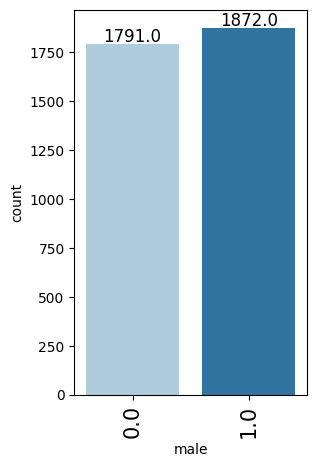

In [26]:
labeled_barplot(df_train, 'male')

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


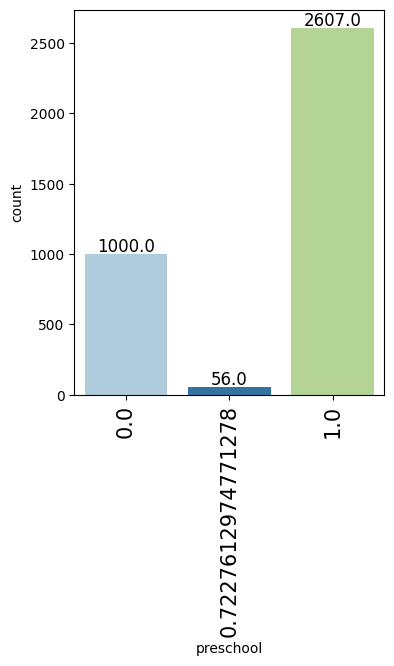

In [27]:
labeled_barplot(df_train, 'preschool')

In [28]:
# Round the 'preschool' column to the nearest integer
df_train['preschool'] = df_train['preschool'].round()

In [29]:
# Verify the changes
print(df_train['preschool'].unique())

[1. 0.]


<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


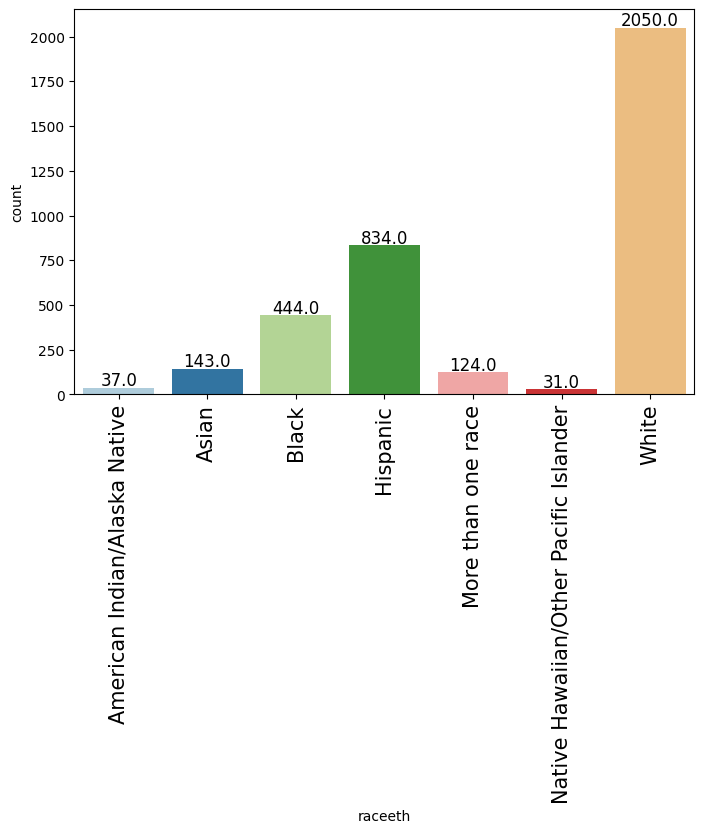

In [30]:
labeled_barplot(df_train, 'raceeth')

In [31]:
# Round the 'expectBachelors' column to the nearest integer
df_train['expectBachelors'] = df_train['expectBachelors'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


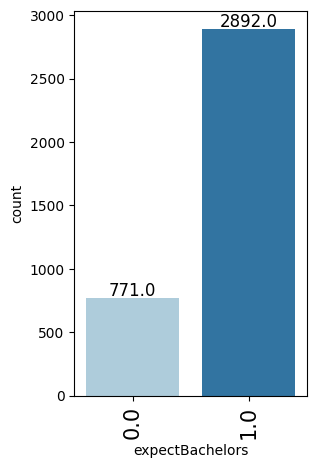

In [32]:
labeled_barplot(df_train, 'expectBachelors')

In [33]:
# Round the 'motherHS' column to the nearest integer
df_train['motherHS'] = df_train['motherHS'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


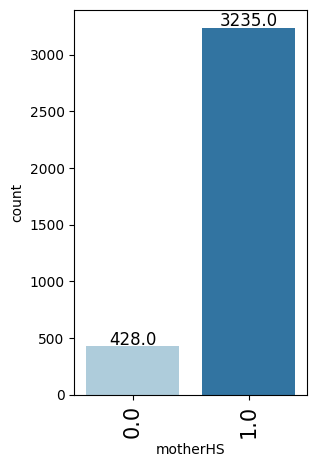

In [34]:
labeled_barplot(df_train, 'motherHS')

In [35]:
# Round the 'motherBachelors' column to the nearest integer
df_train['motherBachelors'] = df_train['motherBachelors'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


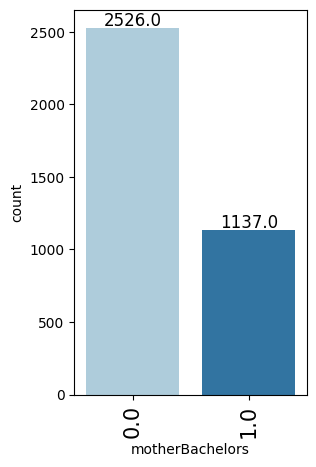

In [36]:
labeled_barplot(df_train, 'motherBachelors')

In [37]:
# Round the 'motherWork' column to the nearest integer
df_train['motherWork'] = df_train['motherWork'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


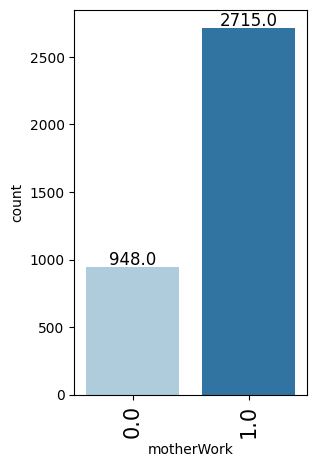

In [38]:
labeled_barplot(df_train, 'motherWork')

In [39]:
# Round the 'fatherHS' column to the nearest integer
df_train['fatherHS'] = df_train['fatherHS'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


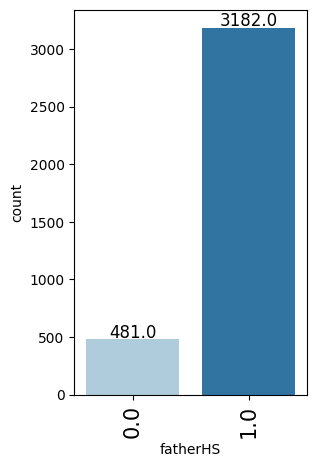

In [40]:
labeled_barplot(df_train, 'fatherHS')

In [41]:
# Round the 'fatherBachelors' column to the nearest integer
df_train['fatherBachelors'] = df_train['fatherBachelors'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


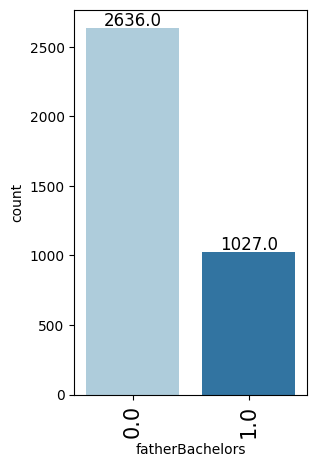

In [42]:
labeled_barplot(df_train, 'fatherBachelors')

In [43]:
# Round the 'fatherWork' column to the nearest integer
df_train['fatherWork'] = df_train['fatherWork'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


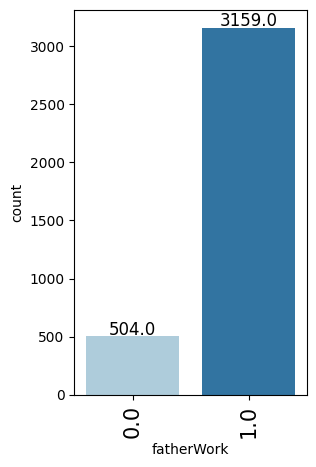

In [44]:
labeled_barplot(df_train, 'fatherWork')

In [45]:
# Round the 'selfBornUS' column to the nearest integer
df_train['selfBornUS'] = df_train['selfBornUS'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


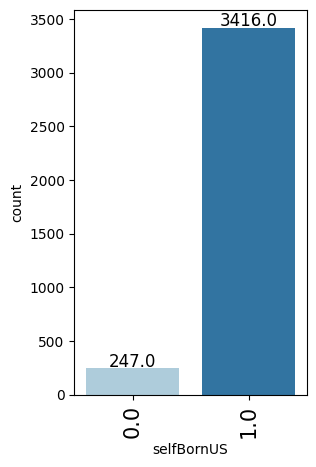

In [46]:
labeled_barplot(df_train, 'selfBornUS')

In [47]:
# Round the 'motherBornUS' column to the nearest integer
df_train['motherBornUS'] = df_train['motherBornUS'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


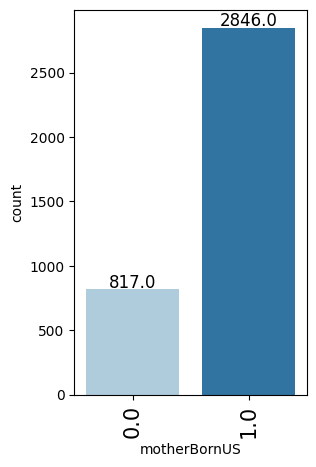

In [48]:
labeled_barplot(df_train, 'motherBornUS')

In [49]:
# Round the 'fatherBornUS' column to the nearest integer
df_train['fatherBornUS'] = df_train['fatherBornUS'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


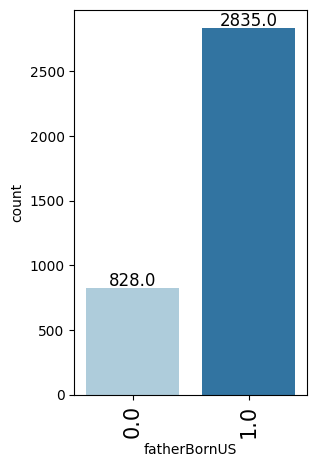

In [50]:
labeled_barplot(df_train, 'fatherBornUS')

In [51]:
# Round the 'englishAtHome' column to the nearest integer
df_train['englishAtHome'] = df_train['englishAtHome'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


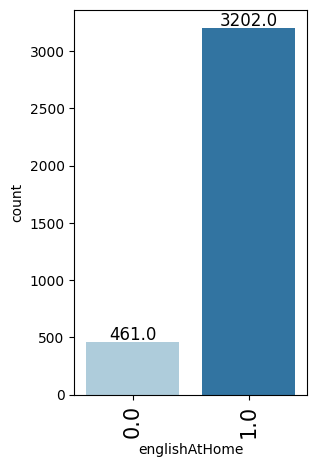

In [52]:
labeled_barplot(df_train, 'englishAtHome')

In [53]:
# Round the 'computerForSchoolwork' column to the nearest integer
df_train['computerForSchoolwork'] = df_train['computerForSchoolwork'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


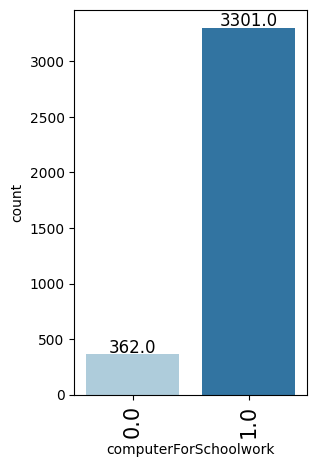

In [54]:
labeled_barplot(df_train, 'computerForSchoolwork')

In [55]:
# Round the 'read30MinsADay' column to the nearest integer
df_train['read30MinsADay'] = df_train['read30MinsADay'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


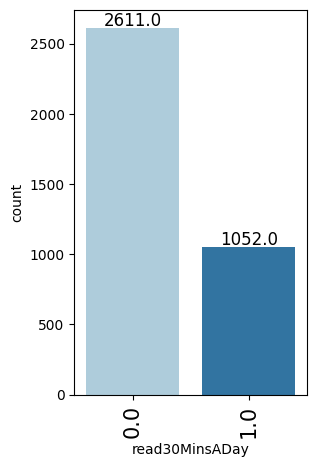

In [56]:
labeled_barplot(df_train, 'read30MinsADay')

In [57]:
# Round the 'schoolHasLibrary' column to the nearest integer
df_train['schoolHasLibrary'] = df_train['schoolHasLibrary'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


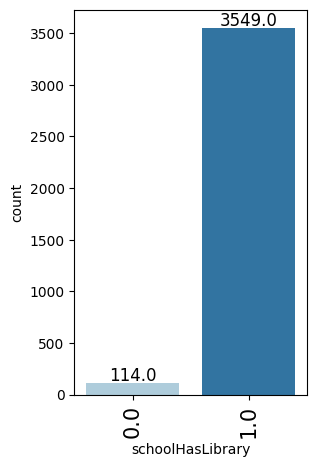

In [58]:
labeled_barplot(df_train, 'schoolHasLibrary')

In [59]:
# Round the 'publicSchool' column to the nearest integer
df_train['publicSchool'] = df_train['publicSchool'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


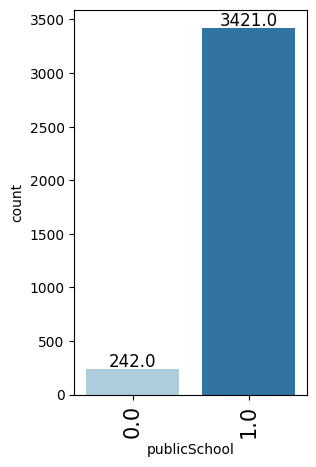

In [60]:
labeled_barplot(df_train, 'publicSchool')

In [61]:
# Round the 'urban' column to the nearest integer
df_train['urban'] = df_train['urban'].round()

<ipython-input-20-0e6a1d369299>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


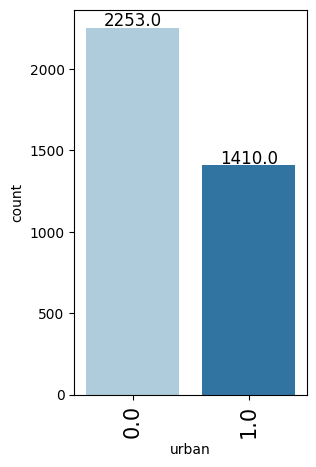

In [62]:
labeled_barplot(df_train, 'urban')

**Hypothesis testing**

Gender

In [63]:
from scipy import stats

# Separate reading scores by gender
male_reading_scores = df_train[df_train['male'] == 1]['readingScore']
female_reading_scores = df_train[df_train['male'] == 0]['readingScore']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(male_reading_scores, female_reading_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reading scores between males and females.")
else:
    print("Fail to reject the null hypothesis. No significant difference in reading scores between males and females.")

T-statistic: -9.425956203551202
P-value: 7.331466031209069e-21
Reject the null hypothesis. There is a significant difference in reading scores between males and females.


Mother Education Levels

In [65]:
# Create groups based on mother's education levels
group_motherHS = df_train[df_train['motherHS'] == 1]['readingScore']
group_motherBachelors = df_train[df_train['motherBachelors'] == 1]['readingScore']
group_no_motherHS = df_train[df_train['motherHS'] == 0]['readingScore']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(group_motherHS, group_motherBachelors, group_no_motherHS)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in reading scores based on mother's education.")
else:
    print("Fail to reject the null hypothesis. No significant difference in reading scores based on mother's education.")

F-statistic: 90.56733492459048
P-value: 2.463378243598643e-39
Reject the null hypothesis. There is a significant difference in reading scores based on mother's education.


Preschool attendance

In [66]:
# Categorize reading scores into high and low (using median as a threshold)
df_train['highReadingScore'] = df_train['readingScore'] > df_train['readingScore'].median()

# Create a contingency table
contingency_table = pd.crosstab(df_train['preschool'], df_train['highReadingScore'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpret the results
if p_val < alpha:
    print("Reject the null hypothesis. There is an association between preschool attendance and reading scores.")
else:
    print("Fail to reject the null hypothesis. No significant association between preschool attendance and reading scores.")

Chi-square Statistic: 0.9825761153909016
P-value: 0.3215636312860856
Fail to reject the null hypothesis. No significant association between preschool attendance and reading scores.
